In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

# Task 1

## Load the data

In [3]:
data = pd.read_csv('data/humicroedit/task-1/train.csv')
data.head()

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage...",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vi...,school,0,0.0


In [4]:
data.shape

(9652, 5)

The `grades` column represents raw grades assigned by the reviewers. Some headlines have 5 reviews, some have just one. 

One review is usually just 0 - the first reviewer defined it as not interesting and there was no follow up.

Questions associated with this:
- distribution of mean grades

- distribution of # reviews each title got 

- how "indecisive" or how much in agreement voters were

Text(0.5, 1.0, 'Dsitribution of mean grades')

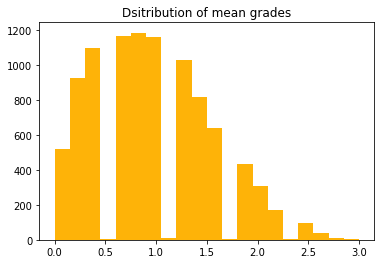

In [124]:
plt.hist(data.meanGrade, bins=20)
plt.title('Dsitribution of mean grades')

Text(0.5, 1.0, 'Number of reviewers per title')

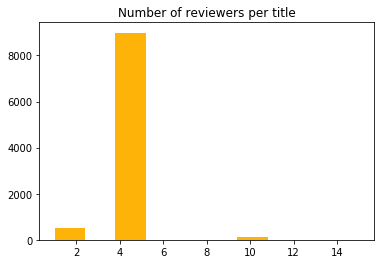

In [3]:
plt.hist(data.grades.astype(str).str.len().values)
plt.title('Number of reviewers per title')

In [42]:
grades = data.grades.astype(str).str.split('')
std_list = np.zeros(len(grades))
for i,g in enumerate(grades):
    g = g[1:][:-1]
    g = list(map(int, g))
    std_list[i] = np.std(g)

Text(0.5, 1.0, 'Distribution of standard deviations for reviews')

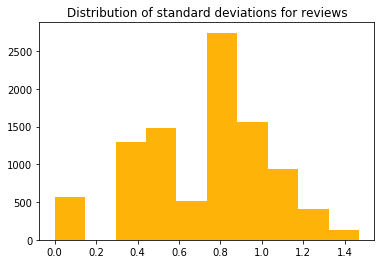

In [7]:
plt.hist(std_list)
plt.title('Distribution of standard deviations for reviews')

In [43]:
data['STD'] = std_list
data['number_reviewers'] = data.grades.astype(str).str.len().values
data.head(3)

,id,original,edit,grades,meanGrade,STD,number_reviewers
0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2,0.400000,5
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6,1.200000,5
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0,0.894427,5


In [44]:
data.to_csv('data/task-1/train_std.csv')

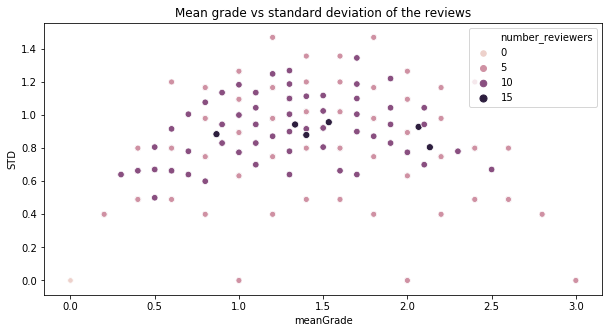

In [129]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=data, x='meanGrade', y='STD', 
                size='number_reviewers', sizes=(30,50),
                hue='number_reviewers')
plt.title('Mean grade vs standard deviation of the reviews');

### Explore weight options

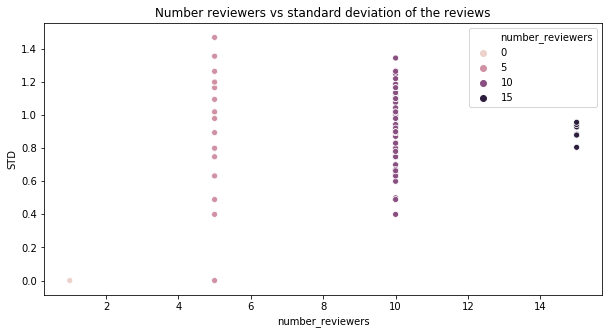

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=data, x='number_reviewers', y='STD', 
                sizes=(30,50),
                hue='number_reviewers')
plt.title('Number reviewers vs standard deviation of the reviews');

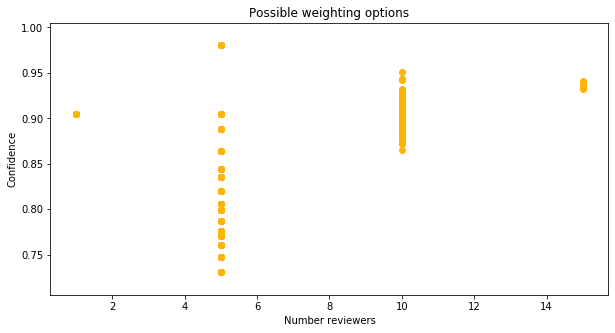

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data['number_reviewers'], np.exp(-(data['STD']+0.1)/data['number_reviewers']))
plt.title('Possible weighting options');
plt.xlabel('Number reviewers');
plt.ylabel('Confidence');

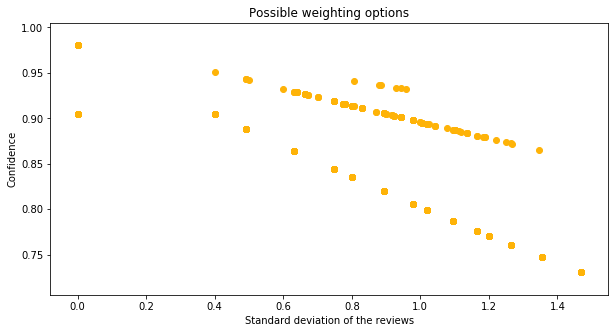

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data['STD'], np.exp(-(data['STD']+0.1)/data['number_reviewers']))
plt.title('Possible weighting options');
plt.xlabel('Standard deviation of the reviews');
plt.ylabel('Confidence');

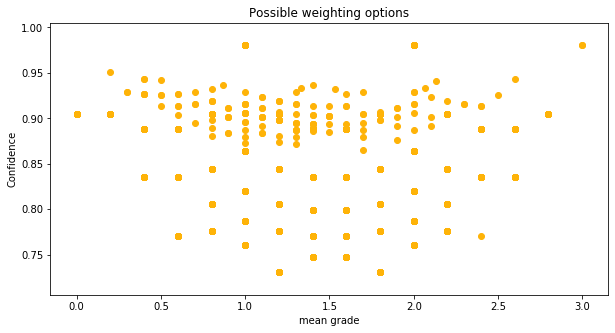

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data['meanGrade'], np.exp(-(data['STD']+.1)/data['number_reviewers']))
plt.title('Possible weighting options');
plt.xlabel('mean grade');
plt.ylabel('Confidence');

(array([ 132., 1045.,  804.,  988., 2705.,  499., 3357.,   63.,   12.,
          47.]),
 array([0.73056376, 0.75552725, 0.78049074, 0.80545423, 0.83041773,
        0.85538122, 0.88034471, 0.9053082 , 0.93027169, 0.95523518,
        0.98019867]),
 <a list of 10 Patch objects>)

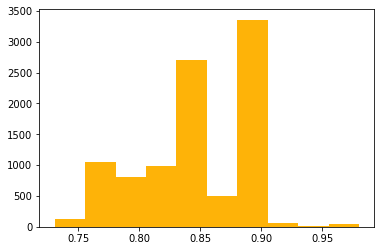

In [39]:
plt.hist(np.exp(-(data['STD']+.1)/data['number_reviewers']))

(array([ 132.,  399.,  923., 1515., 2705.,  492., 1520., 1889.,   30.,
          47.]),
 array([-0.31393877, -0.28454489, -0.25515102, -0.22575714, -0.19636326,
        -0.16696938, -0.13757551, -0.10818163, -0.07878775, -0.04939388,
        -0.02      ]),
 <a list of 10 Patch objects>)

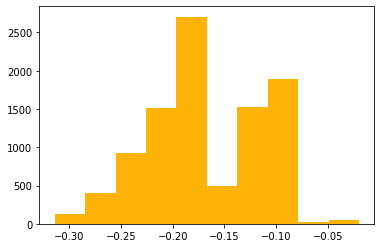

In [46]:
plt.hist((-(data['STD']+.1)/data['number_reviewers']))

There are ~10K training examples, lightly skewed towards less funny replacements. The dataset was collected taking into account the std of the reviews it seems 

In [58]:
np.exp(-.1)

0.9048374180359595

## Look at some examples

In [130]:
pd.set_option('display.max_colwidth', -1)
data.sort_values(by='meanGrade', ascending=False)[['original', 'edit','grades']].head(15)

,original,edit,grades
6075,Recent Scandals Highlight Trump 's Chaotic <Management/> Style,Fashion,33333
1490,"President Trump 's first year <anniversary/> report card , with grades from A + to F",Kindergarten,33333
4438,How an FBI raid fed a rumor that Orrin Hatch was about to become <president/>,pregnant,33332
8726,Trump admits tariffs could cause ' pain ' in <markets/>,buttock,33332
6946,Kasich : Trump <tweets/> ‘ unacceptable ’,hair,33332
3443,"Essential Politics : California 's hottest congressional <races/> , ranked",mistresses,33332
8845,Conservative Leaders Urge Mitch McConnell to <Resign/>,Bathe,33332
4336,The last president to <fire/> an FBI director ? Bill Clinton,kiss,33332
8351,"Trump forced <women/> to wear "" very tiny "" bathing suits and higher heels after buying beauty pageants",sons,33332
7474,Time Asks Donald Trump to Remove Fake <Cover/> From Business Properties,hair,33332


In [131]:
data.sort_values(by='meanGrade', ascending=True)[['original', 'edit','grades']].head(5)

,original,edit,grades
519,Carson proposes that poor should <pay/> more rent,forgo,0
7823,Central Michigan University On Lockdown After <Shooting/> At Dorm Kills 2,stabbing,0
1599,"<Devin Nunes/> tried to discredit the FBI . Instead , he proved it ’s onto something .",dogs,0
7814,What happened to jarred closed <testimony/>,book,0
7801,Putin 's dilemma : Scrap <term/> limits or choose a successor,credit,0


There are a lot of *hair* jokes floating around. 

In [132]:
sum(data.edit.str.lower()=='hair')

53

In [134]:
data[data.edit.str.lower()=='hair'][['original', 'edit','grades']].head(5)

,original,edit,grades
104,Trump Chief of <Staff/> John Kelly calls Confederate Gen. Robert E. Lee an ' honorable man ',hair,33320
294,Trump ’s <mouth/> battles the storm,hair,33222
331,It ’s wishful thinking to blame Hillary Clinton ’s <loss/> on Cambridge Analytica,hair,32100
345,John McCain : GOP <health/> care bill likely ' dead ',hair,33221
405,"Fox News host goes on epic 4-minute rant on Trump 's pattern of false <statements/> : ' Mr. President , that 's your swamp '",hair,22111


So there are a lot of hair jokes. Are they funny enough?

Text(0.5, 0, 'Mean grade')

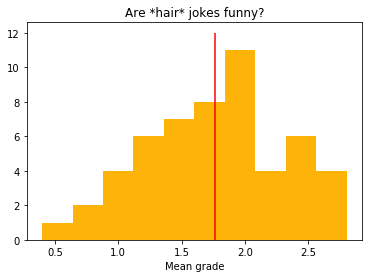

In [144]:
plt.hist(data[data.edit.str.lower()=='hair'].meanGrade, bins=10);
plt.vlines(data[data.edit.str.lower()=='hair'].meanGrade.mean(), ymin=0, ymax=12, color='r')
plt.title('Are *hair* jokes funny?')
plt.xlabel('Mean grade')

So the hair jokes are skewed towards more funny ones

## Other dataset properties

Text(0.5, 1.0, 'Length of sentences provided')

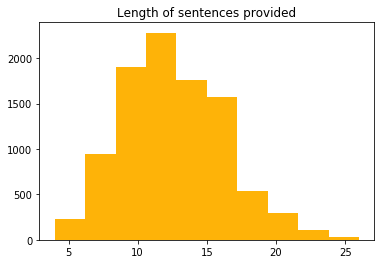

In [155]:
sent_length = [len(i) for i in data.original.str.split(' ')]
plt.hist(sent_length)
plt.title('Length of sentences provided')